Kitabi Duniya, a famous book store in India, which was established before Independence, the growth of the company was incremental year by year, but due to online selling of books and wide spread Internet access its annual growth started to collapse, seeing sharp downfalls, you as a Data Scientist help this heritage book store gain its popularity back and increase footfall of customers and provide ways the business can improve exponentially, apply Association RuleAlgorithm, explain the rules, and visualize the graphs for clear understanding of solution.

# Association Rules : Books Database

What is business objective?
    Business objective of this dataset is to increase the sales of books, thus increasing the popularity of the bookstore.

Constraints: Online Book Management

In [1]:
# importing necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
# importing the book dataset
dataset = pd.read_csv('C:\\Users\\vaibh\\Desktop\\360 Digitmg\\Association\\book.csv')

In [3]:
# checking features in the dataset
dataset.head()

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  \
0         0         1        0         1       0       0        1         0   
1         1         0        0         0       0       0        0         0   
2         0         0        0         0       0       0        0         0   
3         1         1        1         0       1       0        1         0   
4         0         0        1         0       0       0        1         0   

   ItalAtlas  ItalArt  Florence  
0          0        0         0  
1          0        0         0  
2          0        0         0  
3          0        0         0  
4          0        0         0

In [4]:
# dimensions of the dataset
dataset.shape

(2000, 11)

In [5]:
# checking for null values
dataset.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

There are no null values

The dataset has been encoded

In [7]:
# Importing apriori and association rules
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(dataset, min_support = 0.03, use_colnames = True, max_len = 4)
frequent_itemsets = frequent_itemsets.sort_values('support', ascending = False)
frequent_itemsets

C:\Users\vaibh\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                              itemsets
2      0.431                             (CookBks)
0      0.423                            (ChildBks)
3      0.282                            (DoItYBks)
6      0.276                             (GeogBks)
12     0.256                   (ChildBks, CookBks)
..       ...                                   ...
113    0.030           (Florence, ArtBks, GeogBks)
109    0.030           (ArtBks, ItalArt, DoItYBks)
37     0.030                   (ItalArt, DoItYBks)
62     0.030          (ChildBks, CookBks, ItalArt)
136    0.030  (ChildBks, CookBks, ArtBks, ItalArt)

[165 rows x 2 columns]

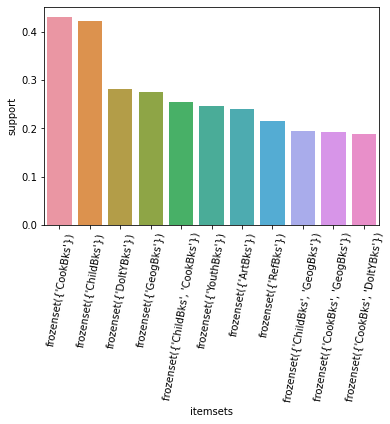

In [8]:
# Barplot of the supports for first 12 itemsets 
sns.barplot(y = frequent_itemsets['support'][0:11],x = frequent_itemsets['itemsets'][0:11])
plt.xticks(rotation = 80)
plt.show()

In [9]:
# Association rules of the dataset
rules = association_rules(frequent_itemsets,metric = 'lift',min_threshold = 1)
rules = rules.sort_values('lift',ascending=False)
rules.head()

antecedents         consequents  antecedent support  \
868           (ArtBks, ItalCook)  (ItalArt, CookBks)              0.0565   
865           (ItalArt, CookBks)  (ArtBks, ItalCook)              0.0410   
877           (ArtBks, ItalCook)           (ItalArt)              0.0565   
880                    (ItalArt)  (ArtBks, ItalCook)              0.0485   
861  (ArtBks, CookBks, ItalCook)           (ItalArt)              0.0565   

     consequent support  support  confidence       lift  leverage  conviction  
868              0.0410   0.0375    0.663717  16.188215  0.035183    2.851763  
865              0.0565   0.0375    0.914634  16.188215  0.035183   11.052429  
877              0.0485   0.0375    0.663717  13.684883  0.034760    2.829461  
880              0.0565   0.0375    0.773196  13.684883  0.034760    4.159977  
861              0.0485   0.0375    0.663717  13.684883  0.034760    2.829461

<AxesSubplot:xlabel='support', ylabel='confidence'>

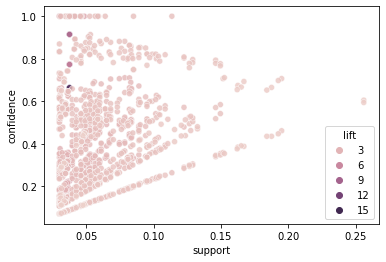

In [10]:
# Scatter plot 
sns.scatterplot(x = rules.support, y = rules.confidence, hue=rules.lift,alpha=0.8)

Observations:
1. In the dataset, 165 rules were found using apriori algorithm.
2. More than 50% data is found in the support level of 0.03 to 0.07
3. Lift ratio ranges from 3 to 16.
4. The highest lift ratio corresponds to confidence value of 0.65 and support value of 0.04.